# Model Developement: KNN for Activity Recognition


## Evaluate KNN performance

In [286]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack, signal
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# load all the generated samples
data = pd.DataFrame()
data = pd.concat([data, pd.read_pickle("./samplesJumping.pkl")])
data = pd.concat([data, pd.read_pickle("./samplesSitting.pkl")])
data = pd.concat([data, pd.read_pickle("./samplesTurningLeft.pkl")])
data = pd.concat([data, pd.read_pickle("./samplesTurningRight.pkl")])
data = pd.concat([data, pd.read_pickle("./samplesWalking.pkl")])
data = pd.concat([data, pd.read_pickle("./samplesWaving.pkl")])

# extract data from pandas dataframe
num_samples = data.shape[0]
num_features = data.shape[1] - 1

X = np.asarray(data.iloc[:,0:num_features])
labels = np.asarray(data.iloc[:,num_features])

labelEnc = LabelEncoder()
y = labelEnc.fit_transform(labels)



[0.87733333 0.87533333 0.87822222 0.87244444 0.88       0.876
 0.87977778]
[0.00158499 0.0012039  0.00158499 0.00175427 0.00161975 0.0015919
 0.00154168]
0.0024741546372570047


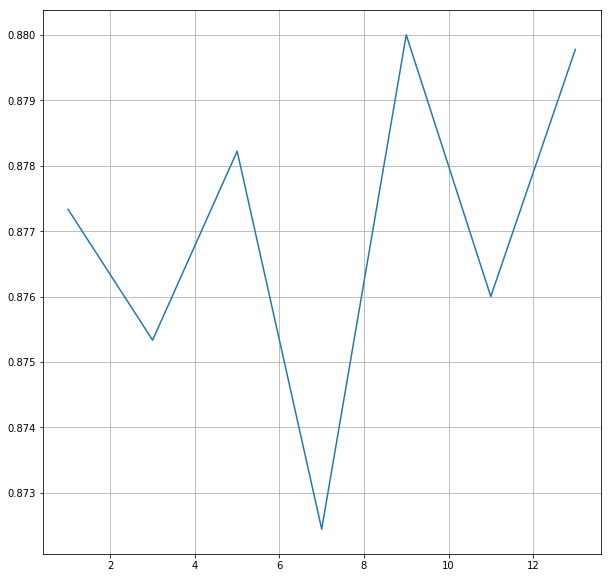

In [308]:
# estimate average accuracy

K = np.arange(1,15,2)
avg_scores = np.zeros((len(K),))
var_scores = np.zeros((len(K),))
for k,i in zip(K, range(len(K))):

    num_epochs = 100
    scores = np.zeros((num_epochs,))
    for epoch in range(num_epochs):
        # split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)
    
        # evaluate KNN
        KNN = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto', p=2)
        KNN.fit(X_train, y_train)
        scores[epoch] = KNN.score(X_test, y_test)
    
    avg_scores[i] = np.mean(scores)
    var_scores[i] = np.var(scores)

print (avg_scores)
print (var_scores)
print (np.std(avg_scores))

plt.figure(figsize=(10,10))
plt.grid()
plt.plot(K,avg_scores)
